<a href="https://colab.research.google.com/github/Makuo67/BTC-Forecasting/blob/main/BTCForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
from sklearn.preprocessing import MinMaxScaler

In [2]:
def load_data(csv_file_name):
    with open(csv_file_name) as f:
        df = pd.read_csv(f)
        df.dropna(inplace=True)
    return df

In [6]:
def preprocess_data(df):
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)

    return scaled_data, scaler

In [7]:
def save_preprocessed_data(data, scaler, save_path, scaler_path='scaler.pkl'):
    np.save(save_path, data)

    import joblib
    joblib.dump(scaler, scaler_path)

In [3]:
csv_file_name = 'bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv'
data = load_data(csv_file_name)
# preprocessed_data, scaler = preprocess_data(data)
# save_preprocessed_data(preprocessed_data, scaler, 'preprocessed_data.npy', 'scaler.pkl')

In [8]:
file_path2 = 'coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv'
data2 = load_data(file_path2)
preprocessed_data2, scaler2 = preprocess_data(data2)
save_preprocessed_data(preprocessed_data2, scaler2, 'preprocessed_data2.npy', 'scaler2.pkl')

In [10]:
data2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
7,1417412400,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0
51,1417415040,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0
77,1417416600,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0
1436,1417498140,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990691 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 136.7 MB


In [17]:
data2.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.485965e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.579676e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.455342e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.486788e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.516933e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1990691 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 136.7 MB


# **Model Training**

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt



In [20]:
def create_dataset(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :-1]
        X.append(a)
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

In [21]:
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

In [23]:
# Load the preprocessed data
data = np.load('preprocessed_data2.npy')


In [24]:
# Create the dataset
time_step = 24  # Use past 24 hours data
X, y = create_dataset(data, time_step)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])


In [27]:

# Build the model
model = build_model((X_train.shape[1], X_train.shape[2]))

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
24884/24884 [==============================] - 958s 38ms/step - loss: 1.2280e-05 - val_loss: 2.7819e-07
Epoch 2/15
24884/24884 [==============================] - 1019s 41ms/step - loss: 1.0768e-06 - val_loss: 1.5207e-06
Epoch 3/15
24884/24884 [==============================] - 999s 40ms/step - loss: 7.0482e-07 - val_loss: 1.4463e-06
Epoch 4/15
24884/24884 [==============================] - 1025s 41ms/step - loss: 6.2005e-07 - val_loss: 1.1384e-07
Epoch 5/15
24884/24884 [==============================] - 1020s 41ms/step - loss: 5.3863e-07 - val_loss: 3.2958e-07
Epoch 6/15
24884/24884 [==============================] - 992s 40ms/step - loss: 4.9147e-07 - val_loss: 3.6415e-07
Epoch 7/15
24884/24884 [==============================] - 992s 40ms/step - loss: 4.4439e-07 - val_loss: 2.0171e-07
Epoch 8/15
24884/24884 [==============================] - 999s 40ms/step - loss: 4.1614e-07 - val_loss: 4.2323e-07
Epoch 9/15
24884/24884 [==============================] - 995s 40ms/step - lo

In [28]:

# Save the model
model.save('btc_forecasting_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

In [30]:
def calculate_accuracy(y_true, y_pred):
    accuracy = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return 100 - accuracy

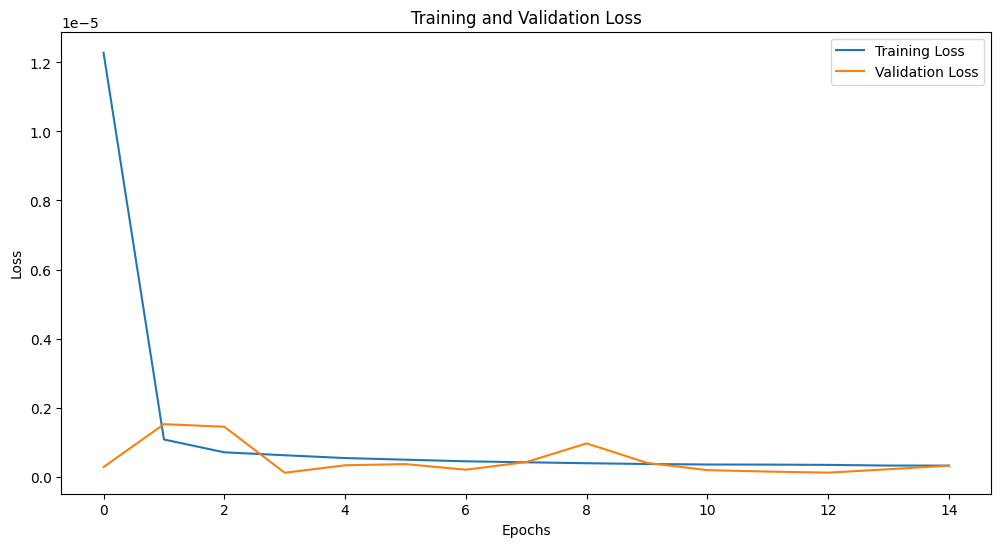

In [34]:
# Plot the training history
plot_training_history(history)

In [3]:
# Predict on the test set
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [1]:
 # Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}%')

NameError: name 'calculate_accuracy' is not defined

In [2]:
from google.colab import files

# After running your script, use the following code to download files
files.download('btc_forecasting_model.h5')
files.download('preprocessed_data2.npy')
files.download('scaler2.pkl')

FileNotFoundError: Cannot find file: btc_forecasting_model.h5